# Multiple Linear Regression on life expectancy data set
 
### About the project- 

       In this project I am using linear regression to predict the life expectancy using the features in the dataset. 


### The project involves

1) Null value treatment

2) Exploratory data analysis

3) Feature transformation using standard scalar

4) Building Linear Regression model using assumptions

5) Model performance evaluation


### Acknowledgements

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

## Importing the required libraries

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns= None
pd.options.display.max_rows= None
pd.options.display.float_format = '{:.6f}'.format

#model building

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#model performance evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot

## About the data set (life_expectancy):-

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.


### Description of the features used in the model-

Country- Country

Year- Year of the data

Status- developing or developed

Life Expectancy- Life Expectancy in age (Target)

Adult Mortality- Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

bmi- body mass index of the country.

Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B- Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles- Measles - number of reported cases per 1000 population

under-five deaths- Number of under-five deaths per 1000 population

Polio- Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure- General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS- Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP- Gross Domestic Product per capita (in USD)

thinness 1-19 years- Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources- Human Development Index in terms of income composition of resources(index ranging from 0 to 1)

Schooling- number of years of Schooling(years)

## Loading the dataset in the notebook

In [131]:
data=pd.read_csv('life_expectancy.csv')

In [132]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000000,263.000000,62,0.010000,71.279624,65.000000,1154,19.100000,83,6.000000,8.160000,65.000000,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000
1,Afghanistan,2014,Developing,59.900000,271.000000,64,0.010000,73.523582,62.000000,492,18.600000,86,58.000000,8.180000,62.000000,0.100000,612.696514,327582.000000,17.500000,17.500000,0.476000,10.000000
2,Afghanistan,2013,Developing,59.900000,268.000000,66,0.010000,73.219243,64.000000,430,18.100000,89,62.000000,8.130000,64.000000,0.100000,631.744976,31731688.000000,17.700000,17.700000,0.470000,9.900000
3,Afghanistan,2012,Developing,59.500000,272.000000,69,0.010000,78.184215,67.000000,2787,17.600000,93,67.000000,8.520000,67.000000,0.100000,669.959000,3696958.000000,17.900000,18.000000,0.463000,9.800000
4,Afghanistan,2011,Developing,59.200000,275.000000,71,0.010000,7.097109,68.000000,3013,17.200000,97,68.000000,7.870000,68.000000,0.100000,63.537231,2978599.000000,18.200000,18.200000,0.454000,9.500000
5,Afghanistan,2010,Developing,58.800000,279.000000,74,0.010000,79.679367,66.000000,1989,16.700000,102,66.000000,9.200000,66.000000,0.100000,553.328940,2883167.000000,18.400000,18.400000,0.448000,9.200000
6,Afghanistan,2009,Developing,58.600000,281.000000,77,0.010000,56.762217,63.000000,2861,16.200000,106,63.000000,9.420000,63.000000,0.100000,445.893298,284331.000000,18.600000,18.700000,0.434000,8.900000
7,Afghanistan,2008,Developing,58.100000,287.000000,80,0.030000,25.873925,64.000000,1599,15.700000,110,64.000000,8.330000,64.000000,0.100000,373.361116,2729431.000000,18.800000,18.900000,0.433000,8.700000
8,Afghanistan,2007,Developing,57.500000,295.000000,82,0.020000,10.910156,63.000000,1141,15.200000,113,63.000000,6.730000,63.000000,0.100000,369.835796,26616792.000000,19.000000,19.100000,0.415000,8.400000
9,Afghanistan,2006,Developing,57.300000,295.000000,84,0.030000,17.171518,64.000000,1990,14.700000,116,58.000000,7.430000,58.000000,0.100000,272.563770,2589345.000000,19.200000,19.300000,0.405000,8.100000


# Exploratory Data Analsis

In [133]:
data.shape

(2938, 22)

In [134]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

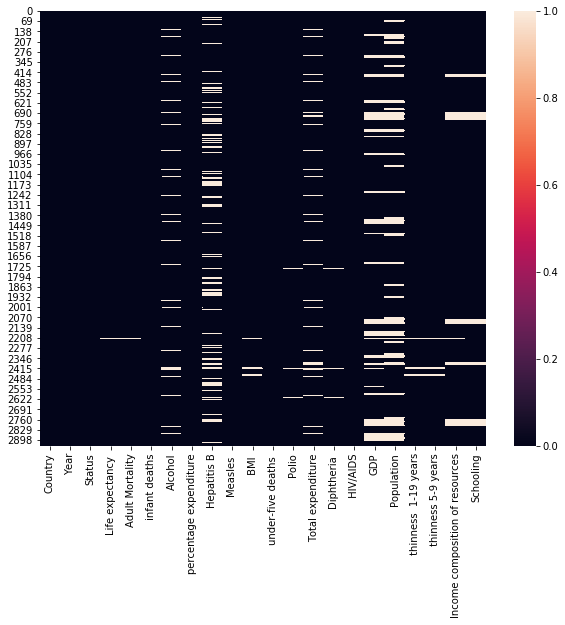

In [135]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())
plt.show()

In [136]:
#removing all the na values in the target column
data.dropna(subset=['Life expectancy '],axis=0,inplace=True)

### Null value Treatment

In [137]:
data.isnull().sum()/len(data)*100

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            6.591530
percentage expenditure             0.000000
Hepatitis B                       18.886612
Measles                            0.000000
 BMI                               1.092896
under-five deaths                  0.000000
Polio                              0.648907
Total expenditure                  7.718579
Diphtheria                         0.648907
 HIV/AIDS                          0.000000
GDP                               15.129781
Population                        21.994536
 thinness  1-19 years              1.092896
 thinness 5-9 years                1.092896
Income composition of resources    5.464481
Schooling                          5.464481
dtype: float64

In [138]:
#removing all the na columns with missing data that are not required for  analysis

data.drop(['Population'],axis=1,inplace=True)
data.drop([' thinness 5-9 years'],axis=1,inplace=True)
data.shape

(2928, 20)

In [139]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2896.000000,2768.000000,2768.000000
mean,2007.500000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,4.850622,0.627419,11.999639
std,4.610560,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,4.420829,0.210978,3.346440
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.000000,0.000000
25%,2003.750000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.600000,0.493000,10.100000
50%,2007.500000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,3.300000,0.677000,12.300000
75%,2011.250000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.200000,0.779250,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,0.948000,20.700000


In [140]:
#fillling the na with mean or median depending on the skewness

data['Hepatitis B']=data['Hepatitis B'].fillna(value=data['Hepatitis B'].median())
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].median())
data[' BMI ']=data[' BMI '].fillna(value=data[' BMI '].median())
data['Polio']=data['Polio'].fillna(value=data['Polio'].median())
data[' thinness  1-19 years']=data[' thinness  1-19 years'].fillna(value=data[' thinness  1-19 years'].median())
data['Diphtheria ']=data['Diphtheria '].fillna(value=data['Diphtheria '].median())
data['Income composition of resources']=data['Income composition of resources'].fillna(value=data['Income composition of resources'].mean())
data['Schooling']=data['Schooling'].fillna(value=data['Schooling'].mean())

In [141]:
#filling with ffill because of data sorted by country

data['GDP'].ffill(axis=0, inplace=True)
data['Total expenditure'].ffill(axis=0, inplace=True)

The Dataset has no null values

### Univariate Analysis

In [142]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 thinness  1-19 years              float64
Income composition of resources    float64
Schooling                          float64
dtype: object

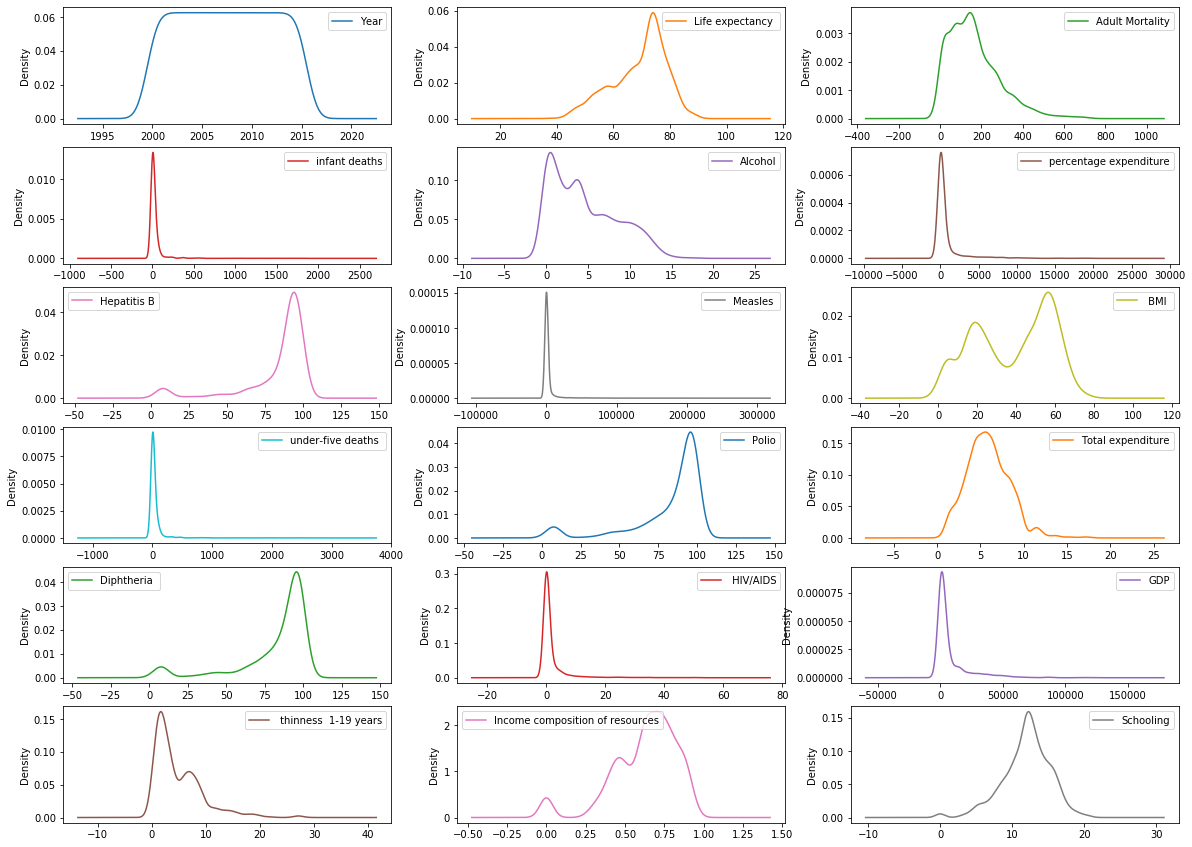

In [143]:
#checking for normality

data.plot(kind='kde',subplots=True,layout=(6,3),sharex=False,figsize=(20,15))
plt.show()

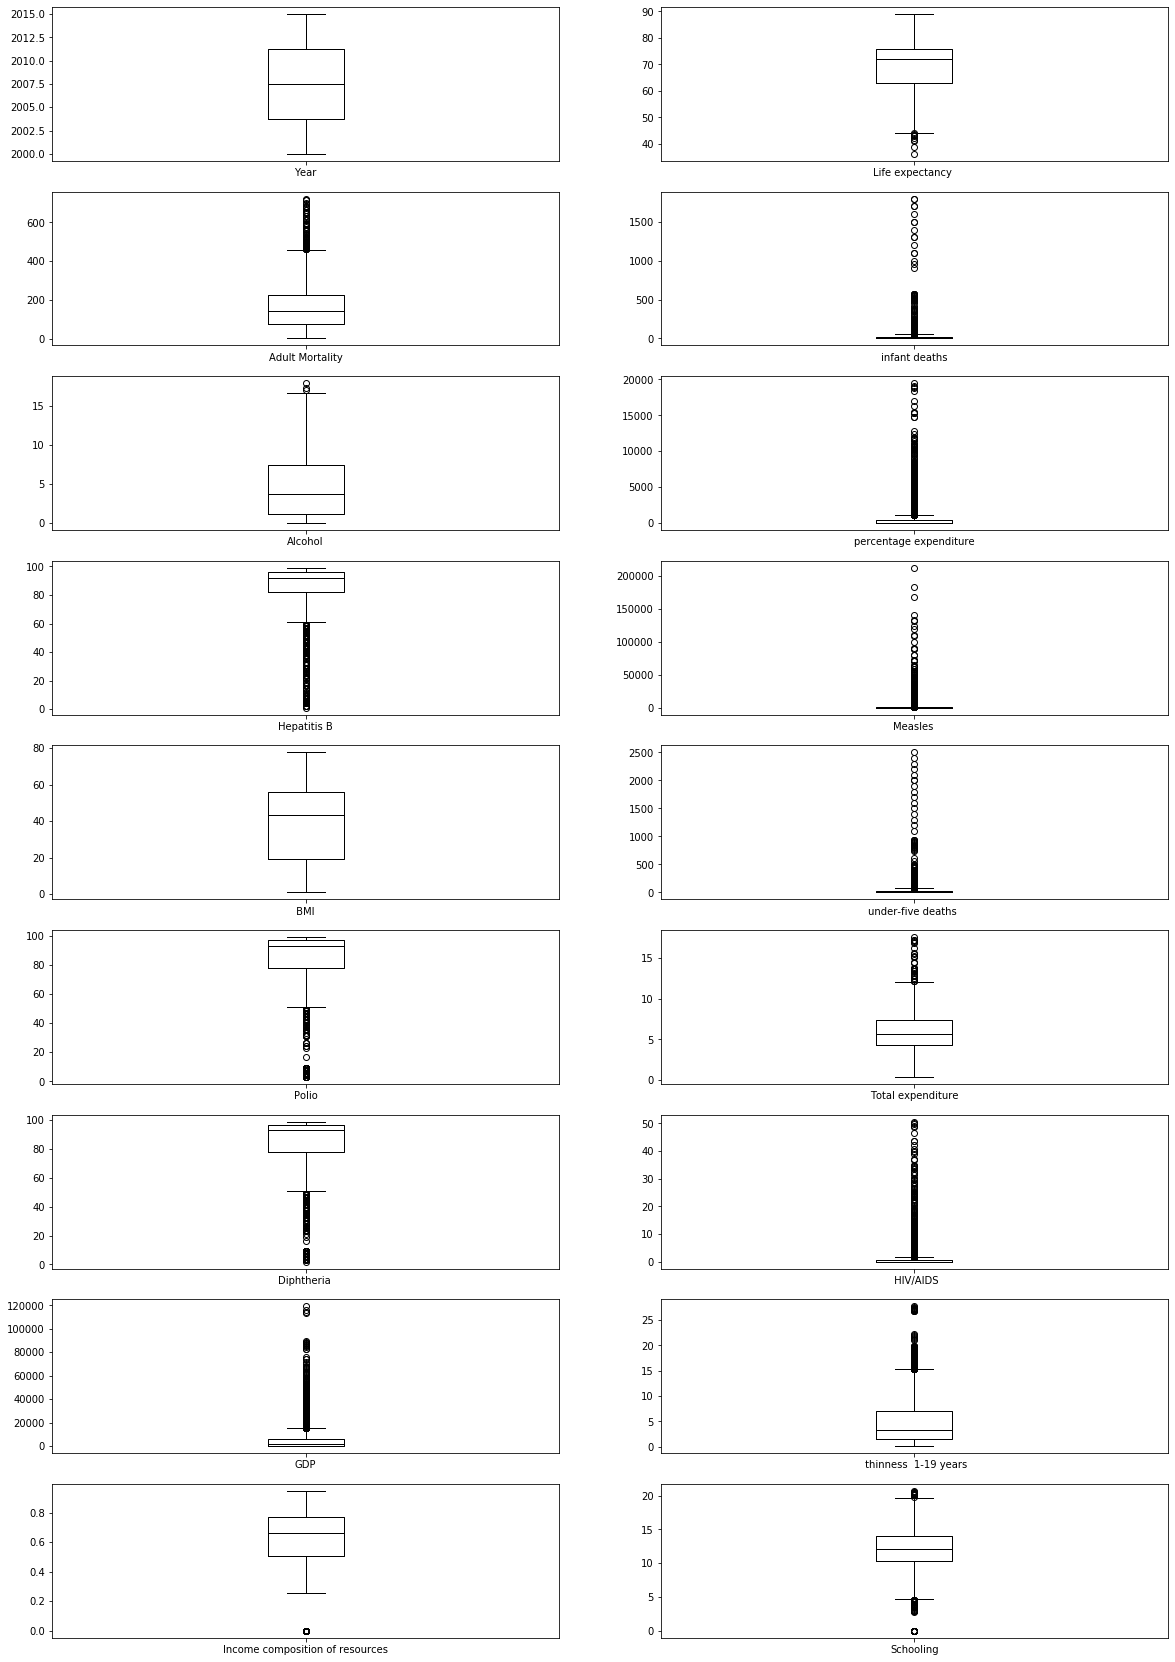

In [176]:
#boxplot for outlier analysis
data.plot(kind='box',subplots=True,color='black',layout=(9,2),sharex=False,figsize=(20,30))
plt.show()

Standardization is required before model fitting

### Multivariate Analysis

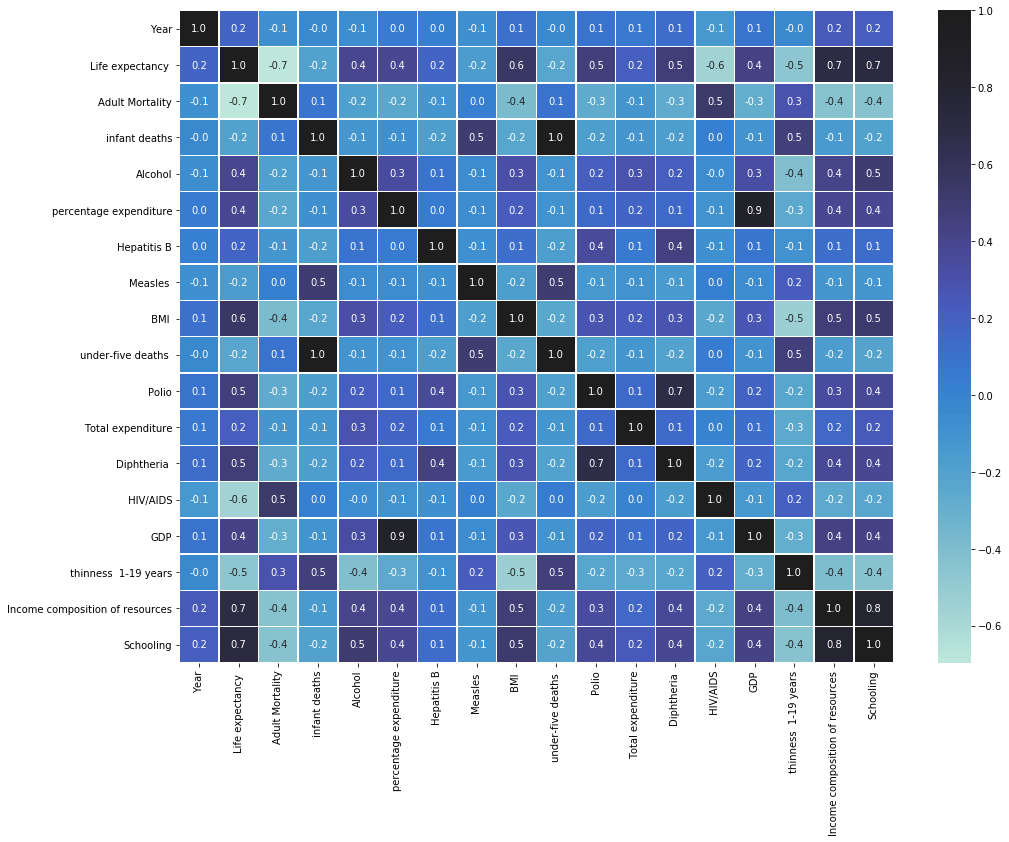

In [175]:
# heatmap
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

### Comparison of categorical data with target variable

In [146]:
print("the top 10 country with highest life expectancy\n")
count=pd.pivot_table(data,values=['Life expectancy '],index=['Country'],aggfunc='mean')
count.sort_values(by=['Life expectancy '],ascending=False).head(10)

the top 10 country with highest life expectancy



,Life expectancy
Country,
Japan,82.537500
Sweden,82.518750
Iceland,82.443750
Switzerland,82.331250
France,82.218750
Italy,82.187500
Spain,82.068750
Australia,81.812500
Norway,81.793750


In [147]:
print("the top 10 lowest with highest life expectancy\n")
count.sort_values(by=['Life expectancy '],ascending=True).head(10)

the top 10 lowest with highest life expectancy



,Life expectancy
Country,
Sierra Leone,46.112500
Central African Republic,48.512500
Lesotho,48.781250
Angola,49.018750
Malawi,49.893750
Chad,50.387500
Côte d'Ivoire,50.387500
Zimbabwe,50.487500
Swaziland,51.325000


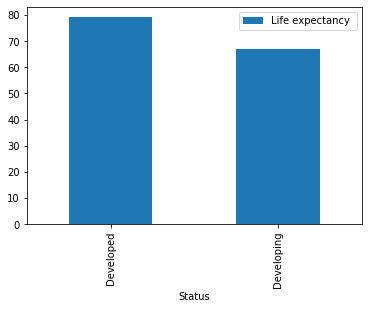

            Life expectancy 
Status                      
Developed          79.197852
Developing         67.111465


In [148]:
stat=pd.pivot_table(data,values=['Life expectancy '],index=['Status'],aggfunc='mean')
stat.sort_values(by=['Life expectancy '],ascending=False).plot(kind='bar')
plt.show()
print(stat)

Life expectancy is clearly higher in developed countries

## Model Building

In [149]:
#standardizing the numeric variables

num_data=data.select_dtypes(include=np.number).drop(['Life expectancy '],axis=1)
sc=StandardScaler()
num_data_sc=sc.fit_transform(num_data)
num_dat=pd.DataFrame(num_data)
num_dat.columns=num_data.columns

In [150]:
#building the model

X=num_dat
encoded_data=pd.get_dummies(data['Country'],prefix='country',drop_first=True)
encoded_data2=pd.get_dummies(data['Status'],prefix='Status',drop_first=True)
y=data['Life expectancy ']


Xcc=pd.concat([pd.DataFrame(X),encoded_data,encoded_data2],axis=1)
Xc=sm.add_constant(Xcc)

In [151]:
#spiliting the dataset into test and train

X_train, X_test, y_train, y_test = train_test_split(Xc,y,random_state=10, test_size=0.3)
linreg = LinearRegression()
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(2049, 201)
(879, 201)
(879,)


In [152]:
#fitting the model
model = linreg.fit(X_train,y_train)
print(f'R^2 score for train: {linreg.score(X_train, y_train)}')
print(f'R^2 score for test: {linreg.score(X_test, y_test)}')

R^2 score for train: 0.9656795709875314
R^2 score for test: 0.9565398143838204


The test and train R^2 is similar so there won't be an overfitting problem.

In [153]:
model=sm.OLS(y_train,X_train).fit()

In [154]:
print("The adjusted r-squared of the model is",model.rsquared_adj)

The adjusted r-squared of the model is 0.9619858092928417


# Checking the Asumptions of Linear Regression

##### Assumption 1- No autocorrelation

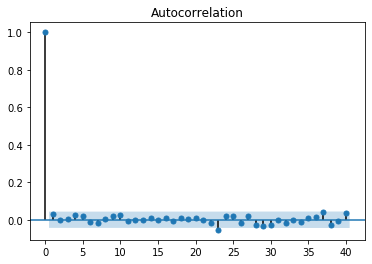

In [155]:
act = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
act.show()

In [156]:
#performing durbin watson test
durbin_watson(model.resid)

1.9364681773853074

since the value is close to 2 we ingore the autocorelation its slightly positive serial correlation, so we accept the model

#### Assumption 2- Normality of residuals

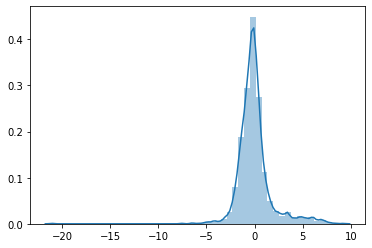

In [157]:
sns.distplot(model.resid)
plt.show()

It appears to be almost normal

#### Assumption 3- No Multi-collinearity

In [158]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data.sort_values(by='VIF',ascending=False).head(5)

,feature,VIF
8,under-five deaths,184.637157
2,infant deaths,182.126785
0,Year,58.794716
16,Schooling,49.433770
15,Income composition of resources,31.578482


dropping infant deaths since it shows multicollinearity

#### Assumption 4- linearity of the residuals

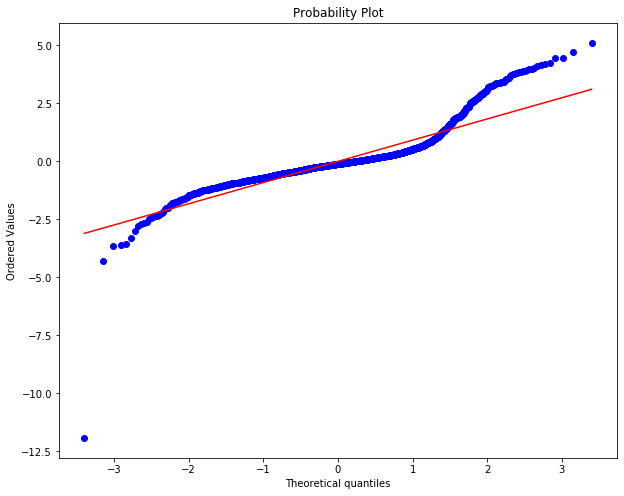

In [159]:
plt.figure(figsize=(10,8))

residual = model.get_influence().resid_studentized_internal
stats.probplot(residual, dist="norm", plot = pylab)
plt.show()

In [160]:
model.resid.mean()

-2.6601378006171282e-11

since the mean value of the residuals is very close to zero we can conclude linearity is present.

##### Assumption 5 -  Homoscedasticity_test(using goldfeld test)

null hypothesis- sigma u is constant accross the range of data

alternate hypothesis- sigma u is not constant accross the range of data

In [161]:
name = ['F statistic', 'p-value']
test=sms.het_goldfeldquandt(model.resid, model.model.exog)
report=pd.Series(data=test[0:2],index=name)
report

F statistic   1.069915
p-value       0.166054
dtype: float64

since p value 0.166 > 0.05 we accept the null hypothesis

## Building a new model after checking assumptions

In [162]:
#dropping the column with highest vif

X=num_dat.drop(['infant deaths'],axis=1)

encoded_data=pd.get_dummies(data['Country'],prefix='country',drop_first=True)
encoded_data2=pd.get_dummies(data['Status'],prefix='Status',drop_first=True)
y=data['Life expectancy ']


Xcc=pd.concat([pd.DataFrame(X),encoded_data,encoded_data2],axis=1)
Xc=sm.add_constant(Xcc)

In [163]:
#building new model

X_train, X_test, y_train, y_test = train_test_split(Xc,y,random_state=10, test_size=0.3)
linreg = LinearRegression()
newmodel = linreg.fit(X_train,y_train)
print(f'R^2 score for train: {linreg.score(X_train, y_train)}')
print(f'R^2 score for test: {linreg.score(X_test, y_test)}')

R^2 score for train: 0.964749340496273
R^2 score for test: 0.956447210842676


Train and Test r-squares are similar so no question of overfitting

In [164]:
newmodel=sm.OLS(y_train,X_train).fit()

## Model performance

In [165]:
#calculating mean square error using the function
mse=round(mean_squared_error(y_test,newmodel.predict(X_test)),4)
print("Mean squared error",mse)

#calculing root mean square error
rmse=round(np.sqrt(mse),4)
print("root mean squared error",rmse)

Mean squared error 3.6617
root mean squared error 1.9136


In [166]:
#user defined function for mean absolute percentage error
def mape(actual,predicted):
    return(np.mean(np.abs((actual-predicted)/actual))*100)

In [167]:
mae_train=round(mean_absolute_error(y_train,newmodel.fittedvalues),4)

print("Mean absolute error",mae_train)

mape_train= round(mape(y_train,newmodel.fittedvalues),4)

print("Mean absolute percentage error",mape_train)

Mean absolute error 1.1452
Mean absolute percentage error 1.7182


In [168]:
#comparing the predicted and actual value

a=newmodel.predict(X_test)
b=y_test

df=pd.concat([a,b],axis=1)
df.columns=['predicted value','actual value']
df['error']=df['predicted value']-df['actual value']

df.head(10)

,predicted value,actual value,error
2757,74.485608,75.100000,-0.614392
780,71.635054,69.700000,1.935054
2737,69.697607,67.700000,1.997607
990,72.663136,72.700000,-0.036864
108,72.150474,72.700000,-0.549526
1145,73.117439,73.200000,-0.082561
2269,74.709486,74.600000,0.109486
210,75.861843,75.200000,0.661843
1963,77.417245,77.300000,0.117245
404,56.703165,58.100000,-1.396835


In [169]:
print("The accuracy of the model is: ",round(newmodel.rsquared_adj,5))

The accuracy of the model is:  0.96098


### Conclusion - The model accuracy is 96.1%